# BibRec: Training Random Forest Model

### Train Random Forest Model on top-rated books
RF Features: Country, State, Age

In [33]:
# Specify where to save the model
model_file = "rf5-ex1.pkl"

In [34]:
from bibrec.server.Utils import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

books, users, ratings = get_normalized_data(books_path='data/normalized_books.csv',
                                            users_path='data/normalized_users.csv',
                                            ratings_path='data/normalized_ratings.csv'')

/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:12: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=";", encoding="latin-1")
/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:94: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  location_seperated = users.location.str.split(',', 2, expand=True)


In [35]:
users

,user_id,age,city,state,country,user_mean,user_count
0,1,27.119806,nyc,new_york,usa,0.0,0.0
1,2,18.000000,stockton,california,usa,0.0,0.0
2,3,69.335792,moscow,other,other,0.0,0.0
3,4,17.000000,porto,other,portugal,0.0,0.0
4,5,43.298515,farnborough,other,united_kingdom,0.0,0.0
...,...,...,...,...,...,...,...
278853,278854,31.325910,portland,oregon,usa,7.0,6.0
278854,278855,50.000000,tacoma,washington,united_kingdom,0.0,0.0
278855,278856,9.440349,brampton,ontario,canada,0.0,0.0
278856,278857,44.526234,knoxville,other,usa,0.0,0.0


In [36]:
books = books.drop(["isbn"], axis=1)
books

,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication
0,Classical Mythology,Mark P. O. Morford,2002,other,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,9780195153446,0.000000,0.0,3
1,Clara Callan,Richard Bruce Wright,2001,other,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9780002005012,7.666667,9.0,4
2,Decision in Normandy,Carlo D'Este,1991,other,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,9780060973124,7.500000,2.0,14
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,other,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,9780374157067,7.833333,6.0,6
4,The Mummies of Urumchi,E. J. W. Barber,1999,other,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,9780393045215,0.000000,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...
270939,There's a Bat in Bunk Five,Paula Danziger,1988,other,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,978044040095,7.000000,1.0,17
270940,From One to One Hundred,Teri Sloat,1991,other,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,978052544763,4.000000,1.0,14
270941,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,other,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,9780060086671,0.000000,0.0,1
270942,Republic (World's Classics),Plato,1996,other,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,9780192126047,0.000000,0.0,9


In [37]:
ratings = ratings.drop(["isbn"], axis=1)
ratings

,isbn13,normalized_rating,user_id,book_rating
0,9780155061224,0.0,276726,5
1,9780521656153,-1.5,276729,3
2,9780521795029,1.5,276729,6
3,9780385501200,0.0,276744,7
4,9780385501200,0.0,11676,10
...,...,...,...,...
9444717,9780515107661,0.0,242006,10
9444718,9780515107661,0.0,249628,10
9444719,9780515107661,0.0,276709,10
9444720,9780590442442,0.0,197659,8


In [39]:
# TODO: Experiment 1
top_ratings = ratings[:10_000]

In [40]:
filtered_books = books[books.isbn13.isin(top_ratings.isbn13)]
filtered_books

,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication
26,Wild Animus,Rich Shapero,2004,other,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,9780971880108,4.390706,581.0,1
37,To Kill a Mockingbird,Harper Lee,1988,other,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,9780446310789,8.943925,214.0,17
102,The Pillars of the Earth,Ken Follett,1996,signet_book,http://images.amazon.com/images/P/0451166892.0...,http://images.amazon.com/images/P/0451166892.0...,http://images.amazon.com/images/P/0451166892.0...,9780451166890,8.390805,87.0,9
134,Little Altars Everywhere: A Novel,Rebecca Wells,1996,other,http://images.amazon.com/images/P/0060976845.0...,http://images.amazon.com/images/P/0060976845.0...,http://images.amazon.com/images/P/0060976845.0...,9780060976842,7.596774,186.0,9
166,Bridget Jones's Diary,Helen Fielding,1997,other,http://images.amazon.com/images/P/0330332775.0...,http://images.amazon.com/images/P/0330332775.0...,http://images.amazon.com/images/P/0330332775.0...,9780330332774,7.458333,72.0,8
...,...,...,...,...,...,...,...,...,...,...,...
246645,Lewis Grizzard on Fear of Flying,Lewis Grizzard,1989,other,http://images.amazon.com/images/P/0929264215.0...,http://images.amazon.com/images/P/0929264215.0...,http://images.amazon.com/images/P/0929264215.0...,9780929264219,5.000000,1.0,16
246646,The Clear Light of Day (King Penguin S.),Anita Desai,1981,other,http://images.amazon.com/images/P/0140058605.0...,http://images.amazon.com/images/P/0140058605.0...,http://images.amazon.com/images/P/0140058605.0...,9780140058604,6.000000,1.0,24
246647,"Northanger Abbey, Lady Susan, the Watsons and ...",Jane Austen,1990,other,http://images.amazon.com/images/P/0192827588.0...,http://images.amazon.com/images/P/0192827588.0...,http://images.amazon.com/images/P/0192827588.0...,978019282750,8.000000,1.0,15
246650,Idoru.,William Gibson,1999,other,http://images.amazon.com/images/P/3453156366.0...,http://images.amazon.com/images/P/3453156366.0...,http://images.amazon.com/images/P/3453156366.0...,978345315632,6.000000,1.0,6


In [41]:
filtered_users = users[users.user_id.isin(top_ratings.user_id)]
filtered_users

,user_id,age,city,state,country,user_mean,user_count
25,26,45.723735,bellevue,washington,usa,9.500000,2.0
98,99,42.000000,franktown,other,usa,7.625000,8.0
164,165,62.000000,olympia,washington,usa,6.000000,3.0
242,243,36.717256,arden hills,other,usa,7.277778,18.0
253,254,24.000000,minneapolis,other,usa,7.771930,57.0
...,...,...,...,...,...,...,...
278551,278552,26.000000,royal oak,michigan,usa,7.000000,7.0
278553,278554,22.000000,takasaki,other,other,8.666667,12.0
278697,278698,42.420163,pasadena,other,other,10.000000,1.0
278824,278825,57.877595,portland,oregon,usa,5.000000,1.0


In [42]:
encoded_books = hot_encode_books(filtered_books)
encoded_books

,book_title,book_author,year_of_publication,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication,...,publisher_harpercollins,publisher_fawcett_books,publisher_signet_book,publisher_random_house_inc,publisher_st_martins_pr,publisher_st._martin's_press,publisher_tor_books,publisher_harpercollins_publishers,publisher_zebra_books,publisher_other
26,Wild Animus,Rich Shapero,2004,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,9780971880108,4.390706,581.0,1,...,0,0,0,0,0,0,0,0,0,1
37,To Kill a Mockingbird,Harper Lee,1988,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,9780446310789,8.943925,214.0,17,...,0,0,0,0,0,0,0,0,0,1
102,The Pillars of the Earth,Ken Follett,1996,http://images.amazon.com/images/P/0451166892.0...,http://images.amazon.com/images/P/0451166892.0...,http://images.amazon.com/images/P/0451166892.0...,9780451166890,8.390805,87.0,9,...,0,0,1,0,0,0,0,0,0,0
134,Little Altars Everywhere: A Novel,Rebecca Wells,1996,http://images.amazon.com/images/P/0060976845.0...,http://images.amazon.com/images/P/0060976845.0...,http://images.amazon.com/images/P/0060976845.0...,9780060976842,7.596774,186.0,9,...,0,0,0,0,0,0,0,0,0,1
166,Bridget Jones's Diary,Helen Fielding,1997,http://images.amazon.com/images/P/0330332775.0...,http://images.amazon.com/images/P/0330332775.0...,http://images.amazon.com/images/P/0330332775.0...,9780330332774,7.458333,72.0,8,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246645,Lewis Grizzard on Fear of Flying,Lewis Grizzard,1989,http://images.amazon.com/images/P/0929264215.0...,http://images.amazon.com/images/P/0929264215.0...,http://images.amazon.com/images/P/0929264215.0...,9780929264219,5.000000,1.0,16,...,0,0,0,0,0,0,0,0,0,1
246646,The Clear Light of Day (King Penguin S.),Anita Desai,1981,http://images.amazon.com/images/P/0140058605.0...,http://images.amazon.com/images/P/0140058605.0...,http://images.amazon.com/images/P/0140058605.0...,9780140058604,6.000000,1.0,24,...,0,0,0,0,0,0,0,0,0,1
246647,"Northanger Abbey, Lady Susan, the Watsons and ...",Jane Austen,1990,http://images.amazon.com/images/P/0192827588.0...,http://images.amazon.com/images/P/0192827588.0...,http://images.amazon.com/images/P/0192827588.0...,978019282750,8.000000,1.0,15,...,0,0,0,0,0,0,0,0,0,1
246650,Idoru.,William Gibson,1999,http://images.amazon.com/images/P/3453156366.0...,http://images.amazon.com/images/P/3453156366.0...,http://images.amazon.com/images/P/3453156366.0...,978345315632,6.000000,1.0,6,...,0,0,0,0,0,0,0,0,0,1


In [43]:
encoded_users = hot_encode_users(filtered_users)
encoded_users

,user_id,age,city,user_mean,user_count,country_usa,country_canada,country_united_kingdom,country_germany,country_spain,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
25,26,45.723735,bellevue,9.500000,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,99,42.000000,franktown,7.625000,8.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
164,165,62.000000,olympia,6.000000,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242,243,36.717256,arden hills,7.277778,18.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
253,254,24.000000,minneapolis,7.771930,57.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278551,278552,26.000000,royal oak,7.000000,7.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
278553,278554,22.000000,takasaki,8.666667,12.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
278697,278698,42.420163,pasadena,10.000000,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
278824,278825,57.877595,portland,5.000000,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [44]:
# RF Features: Country, State, Age, Year-of-Publication, Publisher
df_books = encoded_books.filter(regex="isbn13|normalized_year_of_publication|publisher_", axis=1)
df_books

,isbn13,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,publisher_simon_&amp;_schuster,publisher_penguin_books,...,publisher_harpercollins,publisher_fawcett_books,publisher_signet_book,publisher_random_house_inc,publisher_st_martins_pr,publisher_st._martin's_press,publisher_tor_books,publisher_harpercollins_publishers,publisher_zebra_books,publisher_other
26,9780971880108,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
37,9780446310789,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
102,9780451166890,9,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
134,9780060976842,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
166,9780330332774,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246645,9780929264219,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
246646,9780140058604,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
246647,978019282750,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
246650,978345315632,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
df_users = encoded_users.filter(regex="user_id|age|country_|state_", axis=1)
df_users

,user_id,age,country_usa,country_canada,country_united_kingdom,country_germany,country_spain,country_australia,country_italy,country_france,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
25,26,45.723735,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,99,42.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
164,165,62.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242,243,36.717256,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
253,254,24.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278551,278552,26.000000,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
278553,278554,22.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
278697,278698,42.420163,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
278824,278825,57.877595,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [46]:
# TODO: normalized_rating doesn't make sense yet
# df = df_ratings.filter(regex="isbn13|user_id|normalized_rating", axis=1)
df_ratings = top_ratings.filter(regex="isbn13|user_id|book_rating", axis=1)
df_ratings

,isbn13,user_id,book_rating
0,9780155061224,276726,5
1,9780521656153,276729,3
2,9780521795029,276729,6
3,9780385501200,276744,7
4,9780385501200,11676,10
...,...,...,...
9995,9780025427303,173291,7
9996,9780025427303,174216,5
9997,9780025427303,174615,7
9998,9780025427303,175117,6


In [47]:
df = df_ratings
df = df.merge(df_books, on="isbn13", how="left")
df = df.merge(df_users, on="user_id", how="left")
# df = df.merge(df_books, on="isbn13")
# df = df.merge(df_users, on="user_id")
df

,isbn13,user_id,book_rating,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,9780155061224,276726,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9780521656153,276729,3,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9780521795029,276729,6,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9780385501200,276744,7,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9780385501200,11676,10,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9780025427303,173291,7,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9996,9780025427303,174216,5,11,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9997,9780025427303,174615,7,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9780025427303,175117,6,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Features
# X = df.drop(['user_id', 'isbn13', 'book_rating'], axis=1)
X = df.drop(['user_id', 'book_rating'], axis=1)
# Prediction
Y = df['book_rating']

In [49]:
X

,isbn13,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,publisher_simon_&amp;_schuster,publisher_penguin_books,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,9780155061224,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9780521656153,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9780521795029,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9780385501200,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9780385501200,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9780025427303,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9996,9780025427303,11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9997,9780025427303,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9780025427303,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
Y

0        5
1        3
2        6
3        7
4       10
        ..
9995     7
9996     5
9997     7
9998     6
9999    10
Name: book_rating, Length: 10000, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

In [52]:
from os.path import exists
import pickle

if exists(model_file):
    print("Loading file:", model_file)
    with open(model_file, "rb") as file:
        rfc = pickle.load(file)
else:
    print("Creating new model:", model_file)
    rfc = RandomForestClassifier(n_estimators=100, min_weight_fraction_leaf=0, n_jobs=3, random_state=1, verbose=10)

Loading file: rf5-ex1.pkl


In [53]:
rfc.fit(X_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.2s


building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58

[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.4s


building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.6s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomForestClassifier(min_weight_fraction_leaf=0, n_jobs=3, random_state=1,
                       verbose=10)

In [54]:
import pickle

# Save the model to a file
with open(model_file, "wb") as file:
    pickle.dump(rfc, file)

In [55]:
rfc_pred = rfc.predict(X_test)
rfc_pred

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished


array([ 9,  9,  8, ..., 10,  5, 10])

In [56]:
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred) * 100)

              precision    recall  f1-score   support

           1       0.17      0.10      0.13        29
           2       0.15      0.12      0.14        40
           3       0.16      0.14      0.15        65
           4       0.10      0.08      0.09        66
           5       0.19      0.16      0.17       277
           6       0.25      0.18      0.21       244
           7       0.23      0.24      0.24       440
           8       0.33      0.36      0.35       733
           9       0.27      0.27      0.27       521
          10       0.32      0.35      0.33       585

    accuracy                           0.28      3000
   macro avg       0.22      0.20      0.21      3000
weighted avg       0.27      0.28      0.27      3000

27.633333333333333


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks  

Confusion matrix, without normalization
[[  3   1   3   5   5   3   3   4   0   2]
 [  2   5   2   2   6   7   9   4   2   1]
 [  1   6   9   1  11   2  12  16   4   3]
 [  5   1   1   5  11   6  10  14   7   6]
 [  2   6   6   8  43  13  41  62  45  51]
 [  2   2   4   4  18  43  33  62  36  40]
 [  1   5   8   4  24  25 107 103  76  87]
 [  1   4  11  10  47  27 104 267 131 131]
 [  0   2   6   6  21  21  82 128 142 113]
 [  1   1   5   4  42  22  66 147  92 205]]
Normalized confusion matrix
[[0.1  0.03 0.1  0.17 0.17 0.1  0.1  0.14 0.   0.07]
 [0.05 0.12 0.05 0.05 0.15 0.17 0.23 0.1  0.05 0.03]
 [0.02 0.09 0.14 0.02 0.17 0.03 0.18 0.25 0.06 0.05]
 [0.08 0.02 0.02 0.08 0.17 0.09 0.15 0.21 0.11 0.09]
 [0.01 0.02 0.02 0.03 0.16 0.05 0.15 0.22 0.16 0.18]
 [0.01 0.01 0.02 0.02 0.07 0.18 0.14 0.25 0.15 0.16]
 [0.   0.01 0.02 0.01 0.05 0.06 0.24 0.23 0.17 0.2 ]
 [0.   0.01 0.02 0.01 0.06 0.04 0.14 0.36 0.18 0.18]
 [0.   0.   0.01 0.01 0.04 0.04 0.16 0.25 0.27 0.22]
 [0.   0.   0.01 0.01 0.

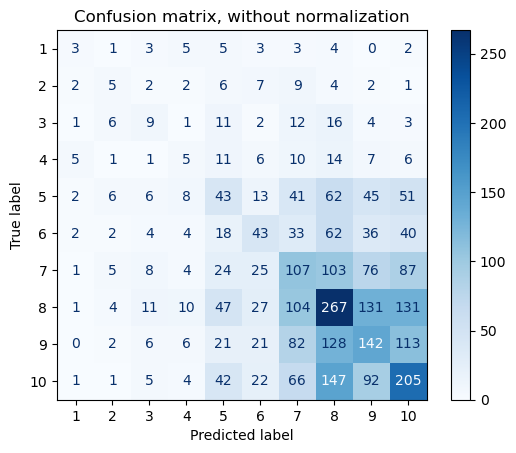

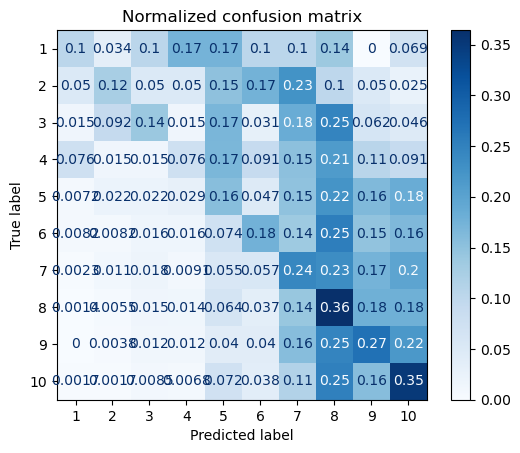

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

classifier = rfc

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [58]:
rfc.score(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished


0.9514285714285714

In [59]:
feature_importance = pd.DataFrame({'Feature_names': X.columns, 'Importances': rfc.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importances', ascending=False)
feature_importance

,Feature_names,Importances
23,age,0.477451
0,isbn13,0.159475
1,normalized_year_of_publication,0.143457
65,state_other,0.015891
22,publisher_other,0.010894
...,...,...
42,country_argentina,0.000000
17,publisher_st_martins_pr,0.000000
3,publisher_silhouette,0.000000
2,publisher_harlequin,0.000000


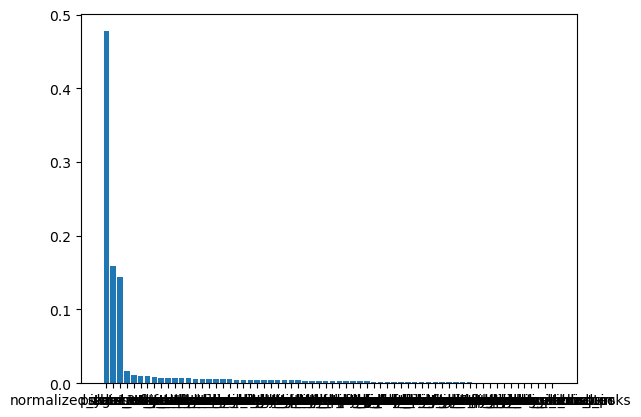

In [60]:
plt.bar(feature_importance['Feature_names'], feature_importance['Importances'])
plt.show()

In [61]:
country_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^country", regex=True)]
country_importance

,Feature_names,Importances
24,country_usa,0.009554
44,country_other,0.007801
25,country_canada,0.005981
27,country_germany,0.004115
29,country_australia,0.003601
26,country_united_kingdom,0.003250
28,country_spain,0.003248
32,country_portugal,0.002941
41,country_malaysia,0.002662
31,country_france,0.002182


In [62]:
state_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^state", regex=True)]
state_importance

,Feature_names,Importances
65,state_other,0.015891
45,state_california,0.010353
49,state_texas,0.007192
50,state_new_york,0.006952
53,state_illinois,0.006608
51,state_florida,0.006435
54,state_washington,0.006360
61,state_missouri,0.005786
58,state_oregon,0.005562
60,state_massachusetts,0.005338


In [63]:
publisher_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^publisher", regex=True)]
publisher_importance

,Feature_names,Importances
22,publisher_other,0.010894
7,publisher_scholastic,0.004705
5,publisher_ballantine_books,0.004166
4,publisher_pocket,0.004123
11,publisher_warner_books,0.002472
13,publisher_harpercollins,0.002381
10,publisher_berkley_publishing_group,0.002278
15,publisher_signet_book,0.002249
6,publisher_bantam_books,0.002161
9,publisher_penguin_books,0.001571


In [64]:
age_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("age", regex=True)]["Importances"]
print("age:", age_importance)
print("country_importance:", country_importance["Importances"].sum())
print("state_importance:", state_importance["Importances"].sum())
print("publisher_importance:", publisher_importance["Importances"].sum())

age: 23    0.477451
Name: Importances, dtype: float64
country_importance: 0.05735552335251416
state_importance: 0.11842314274147114
publisher_importance: 0.04383932313972425
